<a href="https://colab.research.google.com/github/osamajalil123/BoneFracturePrediction/blob/main/PythonCode/Bone_Fracture_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract/Introduction
Medical imaging to analyze and detect different diseases and problems now a day an emerging field.
In this project we will design automated techniques and methods to analyze and detect bone fracture
from X-ray images. X-ray images when examined manually it is time consuming and prone to errors.
So our proposed system is able to detect fracture more accurately. images are a crucial resource for
assessing the severity and prediction of bone injuries caused by trauma or accident. Fracture
detection in long bones is a very challenging task due to the limited resolution of the original X-Ray
images, as well as the complexity of bone structures and their possible fractures. So our proposed
automated bone fracture detection system will work on these aspects.
Functional Requirements:
The system should have the following features:
• Image Datasets are maintained.
• Image is selected for examine.
• Image is shown as real image and then focused or noise removed image
• Noise is removed from the image and image is transformed to clearer image so that system
can easily detect fracture
• Clearer image is used to detect fracture
• System detects fracture based on the type of fracture. 1.fracture 2. Non fracture

We have Bone Fracture Dataset that contains training and testing images of fractured and not fractured images

We have used two algorithms to detect weather the bone is fractured or not fractured (Logistic Regression and SVM)

First of all we have upload the Dataset in Google Drive and Mount the drive so it get configured and we will make the predictive model on the data given

#Loading Required Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import os

#Preparing the Data

As machine learning works on numeric data so we labled the data fractured with 0 and Not Fractuerd with 1

In [ ]:
path=os.listdir('/content/drive/MyDrive/BoneFractureDataset/training')
classes={'fractured':0,'not_fractured':1}

In [ ]:
import cv2

We have created two python lists X and Y. In X we will append all the images and in Y we will append the targets of the particular image.
We created the nested loop to read all the images one by one in X and Y and resize all the images as (200,200) (because the size of all the images were different)

In [ ]:
X=[]
Y=[]
for cls in classes:
    pth='/content/drive/MyDrive/BoneFractureDataset/training/' + cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X=np.array(X)
Y=np.array(Y)

We checked the number of fractured bones and the number of unfractured bones using value_counts() function

In [ ]:
pd.Series(Y).value_counts()

0    4480
1    4383
dtype: int64

The shape of X is here of 3D means 8863 total images with 200*200

In [ ]:
X.shape

(8863, 200, 200)

We have checked the image at 0 index using matplotlib function

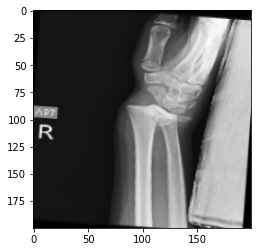

In [ ]:
plt.imshow(X[0],cmap='gray')

#Preparing the Data

As sklearn works on two dimentions and we have three dimentions. So we convert X into two dimentions. To do this we have to flatten all the images (i.e.. 8863) and change (200*200) into (40000). Number of rows would be 8863 that is len(X) and the number of columns would be -1

In [ ]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(8863, 40000)

#Splitting Data

From 8863 samples we will use 20 percent data as testing and remaining 80 percent for training the data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.20)

So here we have 7090 (80%) for training and 1773 (20%) for testing

In [ ]:
xtrain.shape,xtest.shape

((7090, 40000), (1773, 40000))

#Feature Scaling

To bring all the features into same scale we have use feature scaling. As RGB value ranges to 0 to 255 so we simply divided the samples to 255. So the final value would be from 0 to 1. Before scaling the values were (252,0) and (250,0) and After divided 255 they gets between 0 and 1

In [ ]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

252 0
250 0
0.9882352941176471 0.0
0.9803921568627451 0.0


#Training Model

We have use Logistic Regression and SVM and we will compare boths performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

For LG we set penality perameter of 0.1 and fit the data

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

LG not performs well as it overfits the data

#Evaluation of LG

In [ ]:
print("Testing Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))

Testing Score: 0.929901269393512
Testing Score: 0.8426395939086294


In [ ]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

SVM performs better then LG and it has good accuracy

#Evaluation of SVM

In [ ]:
print("Testing Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Testing Score: 0.9674188998589562
Testing Score: 0.9464184997179921


 # Check where the prediction is not equal to actual lable

In [ ]:
|pred=sv.predict(xtest)
np.where(ytest!=pred)

(array([   6,   51,   82,  110,  132,  148,  149,  173,  182,  214,  218,
         225,  236,  254,  274,  291,  310,  312,  314,  321,  329,  371,
         382,  415,  419,  426,  437,  444,  448,  496,  500,  504,  557,
         613,  630,  670,  672,  677,  693,  707,  725,  795,  804,  857,
         890,  927,  931,  934,  941,  950,  954,  962,  975,  985, 1000,
        1019, 1043, 1106, 1115, 1179, 1210, 1226, 1227, 1232, 1236, 1262,
        1317, 1331, 1333, 1353, 1357, 1362, 1365, 1379, 1416, 1422, 1423,
        1428, 1442, 1447, 1461, 1465, 1467, 1470, 1488, 1491, 1496, 1503,
        1504, 1557, 1581, 1638, 1662, 1706, 1715]),)

In [ ]:
pred[5]

1

In [ ]:
ytest[5]

1

# Testing Model

We have created dictionary (dic). We will test the model on testing data (which was on testing folder.

In [ ]:
dec={0:"fractured",1:"not_fractured"}

First of all we will check for fractued bones. We will read first 25 images from all images

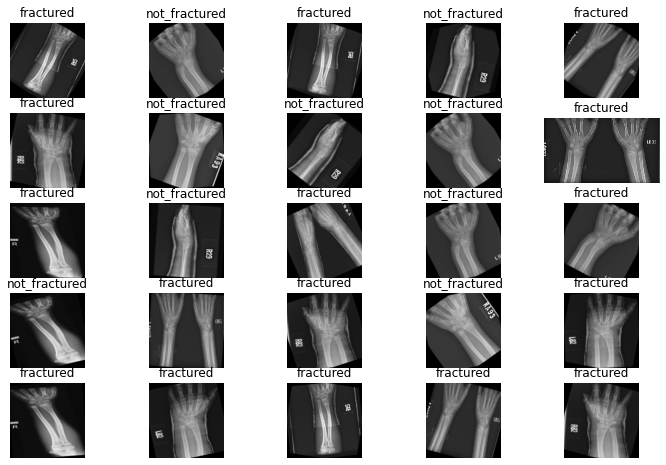

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/BoneFractureDataset/testing')
c=1
for i in os.listdir('/content/drive/MyDrive/BoneFractureDataset/testing/fractured/')[:25]:
  plt.subplot(5,5,c)

  img=cv2.imread('/content/drive/MyDrive/BoneFractureDataset/testing/fractured/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1


Now we will check for not_fractued bones and we checked for first 16 images

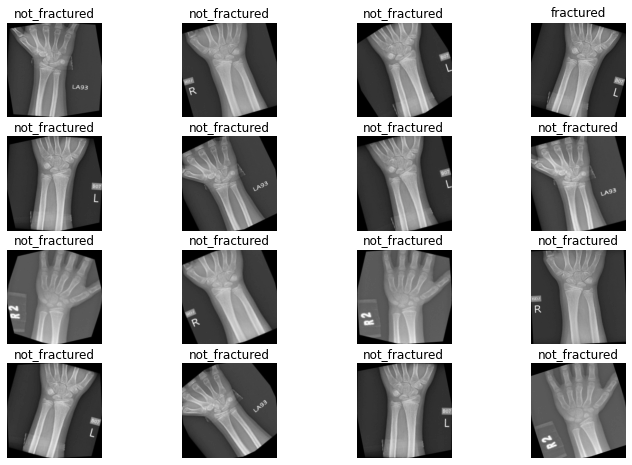

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/BoneFractureDataset/testing')
c=1
for i in os.listdir('/content/drive/MyDrive/BoneFractureDataset/testing/not_fractured/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/BoneFractureDataset/testing/not_fractured/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1
